In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [12]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
import matplotlib.pyplot as plt

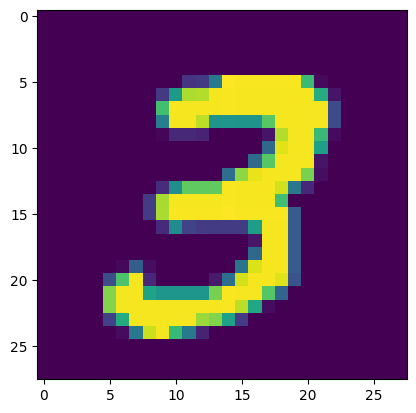

In [15]:
plt.imshow(X_train[7])

In [16]:
 X_train= X_train/255
 X_test = X_test/255
 X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [27]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [31]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2981 - val_loss: 0.1595
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1200 - val_loss: 0.1159
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0829 - val_loss: 0.0927
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0616 - val_loss: 0.0931
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0481 - val_loss: 0.0942
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0379 - val_loss: 0.1023
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0322 - val_loss: 0.0990
Epoch 8/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0268 - val_loss: 0.1172
Epoch 9/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0223 - val_loss: 0.1031
Epoch 10/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.020

In [32]:
y_probab = model.predict(X_test)
y_probab

313/313 [==============================] - 1s 2ms/step


array([[2.87898062e-18, 7.28068229e-17, 2.64174641e-13, ...,
        9.99999940e-01, 6.98553614e-19, 2.62428912e-10],
       [1.68816675e-23, 2.41418874e-14, 9.99999940e-01, ...,
        4.41516897e-23, 1.57411958e-17, 5.54661655e-30],
       [8.08494244e-12, 9.99999821e-01, 5.46370796e-11, ...,
        9.61323892e-08, 1.89931959e-09, 8.21176758e-14],
       ...,
       [1.14254153e-37, 9.20622457e-21, 7.59229281e-38, ...,
        2.03201425e-20, 4.62541098e-25, 2.04635232e-11],
       [5.71193507e-29, 3.73021353e-26, 4.53884972e-35, ...,
        4.50256606e-20, 6.39634568e-10, 1.03977965e-23],
       [2.08425035e-15, 2.89274234e-25, 4.37375303e-20, ...,
        1.22681677e-28, 6.04375874e-23, 1.26355882e-23]], dtype=float32)

In [33]:
y_pred = y_probab.argmax(axis=1)

In [34]:
y_pred.shape

(10000,)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.977

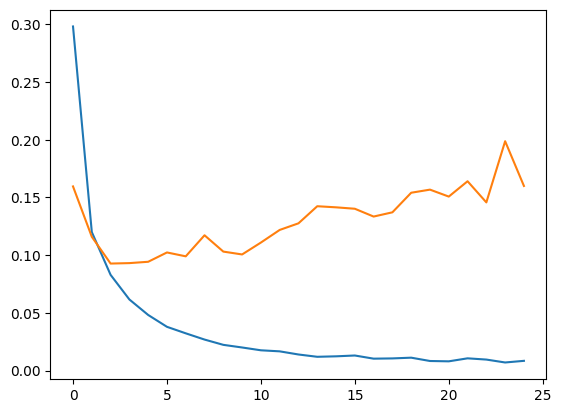

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

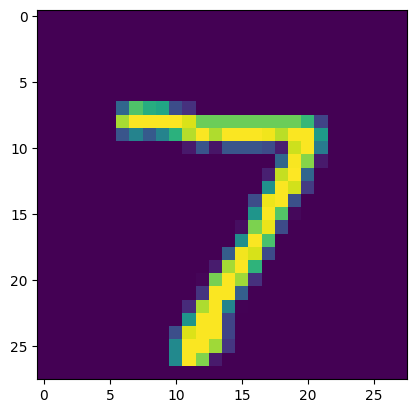

In [39]:
plt.imshow(X_test[0])

In [42]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 34ms/step


array([7])